# Neoscholar Machine Learning Tutorials
### Session 04. Linear and Logistic Regression

### Contents
1. Linear Regression
2. Logistic Regression

### Aim
At the end of this session, you will be able to:
- Implement your first Machine Learning model for regression and classification
- Be more familiar with Sklearn lib


### Outline
1. Linear Regression
    1.1 Basic Linear Regression
    1.2 Advanced Linear Regression
2. Logistics Regression

## 1. Linear Regression

We are going to explore both the basic linear regression and more advanced linear regression with regulation terms, i.e., LASSO, Ridge, Elastic net regression. The modelling process begins from importing the dataset and ends at model evaluation.

This time we are going to practice Linear Regression with Boston House Price Data that are already embedded in scikit-learn datasets

In [1]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets as datasets
BOSTON_DATA = datasets.load_boston()
# TODO: print the dataset and see how the data look like.
print(BOSTON_DATA)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Check what features this dataset contains.

In [3]:
print(BOSTON_DATA['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Simple Exploratory Data Analysis

As we discussed before, EDA is one of the most important step to implement a machine learning model in practice. You have to not only understand the data you have but also clean it accordingly. In this tutorial, we will visualise the data and then analyse their correlations.

First of all, let's define some useful funcitons.

In [4]:
# Function to load both boston data and target, and convert it as dataframe.
def add_target_to_data(dataset):
    # TODO: make the raw dataset cleaner and easier to process -> use dataframe
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    # TODO: put the target data (price) to the dataframe we just made.
    print("Before adding target: ", df.shape)
    df['PRICE'] = dataset.target
    print("After adding target: {} \n {}\n".format(df.shape, df.head(2)))
    return df

In [5]:
# Function to visualise the relations between features and the target
def plotting_graph(df, features, n_row=2, n_col=5):
    fig, axes = plt.subplots(n_row, n_col, figsize=(16, 8))
    assert len(features) == n_row * n_col
    for i, feature in enumerate(features):
        row = int(i / n_col)
        col = i % n_col
        sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])
    plt.show()

Apply the function `add_target_to_data()` to transform the dataset into `Dataframe` type.

#### Visualisation

In [6]:
boston_df = add_target_to_data(BOSTON_DATA)
print(boston_df.head())

Before adding target:  (506, 13)
After adding target: (506, 14) 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4

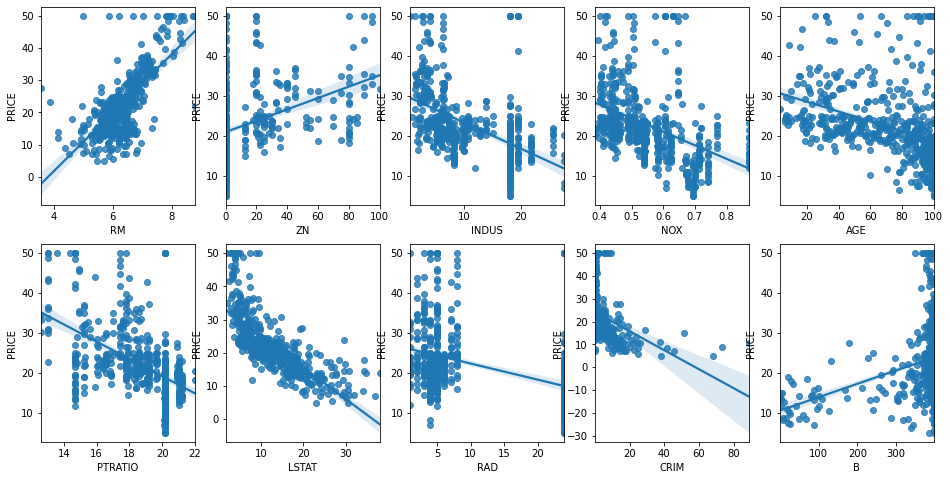

In [7]:
# Only ten features are demonstrated for simplicity
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'CRIM', 'B']
plotting_graph(boston_df, features, n_row=2, n_col=5)

Correlation is a statistical measure that tells us about the association between the two variables. It describes how one variable behaves if there is some change in the other variable.

#### Pearson vs Spearman correlation

Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

Spearman correlation: Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

In [8]:
# Calculate the Pearson correlation matrix.
correlation_matrix = boston_df.corr(method='pearson').round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Visualise the correlation matrix by heat map.

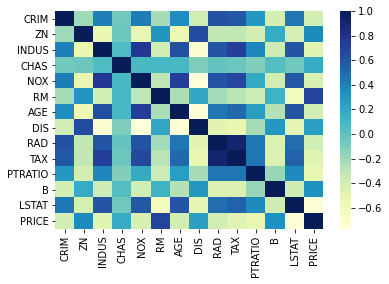

In [9]:
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

### Basic Linear Regression

#### Dataset Split

We have practiced how to split a dataset into the testing and training set. Applying the `train_test_split()` function in `sklearn` to split your dataset with the ratio of 90:10.

In [10]:
from sklearn.model_selection import train_test_split

# Todo: split your dataset into training and testing sets.
# Set the random state as 17 to ensure every one to get the same result
train_X, test_X, train_Y, test_Y = train_test_split(boston_df.iloc[:,:13], boston_df.iloc[:,13], 
                                                    test_size=0.1, random_state=17)

Further split your training set into training set and validation set with a ratio of 90:10.

In [11]:
# Todo: split your dataset into training and validation sets. 
# set the random state as 17 to ensure every one to get the same result
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, 
                                                  test_size=0.1, random_state=17)

#### Train and evaluate the basic Linear Regression model

Let's train your model.

In [12]:
from sklearn.linear_model import LinearRegression

# TODO: initialize your linear regression model
lr_model = LinearRegression()
# TODO: Train!
lr_model.fit(train_X, train_Y)

LinearRegression()

Then, we should evaluate it on the validation set.

In [13]:
from sklearn.metrics import mean_squared_error
# TODO: make predictions with validation data!
preds = lr_model.predict(val_X)
# TODO: what is mse between the answer and your prediction?
lr_mse = mean_squared_error(val_Y, preds)
print('LR_MSE: {0:.4f}'.format(lr_mse))
# Sort regression coefficient.
coeff = pd.Series(data=lr_model.coef_, index=train_X.columns).sort_values(ascending=False)
print(coeff)
# Todo: Which feature is the most important?

LR_MSE: 27.2490
RM          3.995668
CHAS        2.867137
RAD         0.313683
ZN          0.051286
INDUS       0.049180
B           0.011265
AGE        -0.003035
TAX        -0.011734
CRIM       -0.105635
LSTAT      -0.602028
PTRATIO    -0.898572
DIS        -1.459499
NOX       -14.066783
dtype: float64


Plot the predicted price v.s. expected price (true)

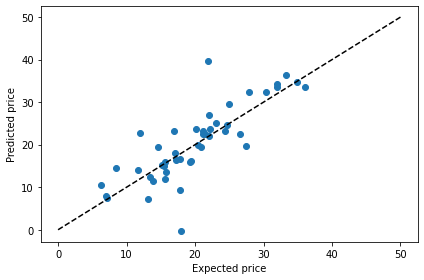

In [14]:
plt.scatter(val_Y, preds)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

#### Mannully implement the basic single variant linear regression

Recall how we estimate the linear regression parameters based on OLS method. You should implement the `paramEstimates(x, y)` function that estimates the parameters of alpha and beta as follows:
\begin{align}
\hat{\beta} & =  \frac{\sum_{i=1}^n x_i\left(y_i - \bar{y} \right)}{\sum_{i=1}^n x_i\left(x_i - \bar{x} \right)}\\
\hat{\alpha} & = \bar{y}-\hat{\beta}\bar{x}
\end{align}

You have, however, to complete the `linearRegr_Predict(x_train, y_train, xTest)` function, or write your own, that returns the output variable y given the input x as follows: 
\begin{align}
\hat{y} & = \hat{\alpha}+\hat{\beta}x
\end{align}

For simplication, we only apply the most important feature `RM` as the regressor.

In [44]:
# Firstly, let's implement it using sklearn
# TODO: initialize your linear regression model
singleVar_lr_model = LinearRegression()
# TODO: Train!
singleVar_lr_model.fit(np.array(train_X['RM']).reshape(-1,1), train_Y)
print("The intercept (alpha) is {}:".format(singleVar_lr_model.intercept_))
print("The slope (beta) is {}:".format(singleVar_lr_model.coef_[0]))
# TODO: make predictions with validation data!
singleVar_preds_sk = singleVar_lr_model.predict(np.array(val_X['RM']).reshape(-1,1))
# TODO: what is mse between the answer and your prediction?
singleVar_lr_mse_sk = mean_squared_error(val_Y, singleVar_preds_sk)
print('LR_MSE_sk: {0:.4f}'.format(singleVar_lr_mse_sk))

The intercept (alpha) is -36.60100825629253:
The slope (beta) is 9.464418317902515:
LR_MSE_sk: 47.3492


In [45]:
def paramEstimates(x, y):
    beta = np.sum(np.multiply(x,(np.add(y, -np.mean(y))))) / np.sum(np.multiply(x, (np.add(x, - np.mean(x)))))
    alpha = np.mean(y) - beta*np.mean(x)
    return alpha, beta

def linearRegr_Predict(x_train, y_train,x_test):
    alpha, beta = paramEstimates(x_train, y_train)
    print("The intercept (alpha) is: {}".format(alpha))
    print("The slope (beta) is: {}".format(beta))
    pred =  np.add(alpha, np.multiply(beta,x_test))
    return pred

singleVar_lr_preds_mannul=linearRegr_Predict(train_X.loc[:,'RM'], train_Y, val_X.loc[:,'RM'])
# Now evaluate your model and compare the performance with the one using Sklearn lib
singleVar_lr_mse_mannul = mean_squared_error(val_Y, preds_mannul)
print('LR_MSE_mannul: {0:.4f}'.format(singleVar_lr_mse_mannul))

The intercept (alpha) is: -36.60100825629226
The slope (beta) is: 9.464418317902473
LR_MSE_mannul: 47.3492


#### PCA

Now we are going to compare the models performance if we apply the PCA to reduce the original dataset with 13 features into 8 dimensions.

To keep the test data is unseen from the beginning to the end, you may need to fit your PCA model in training set and transform the testing set by applying the trained PCA model.

In [15]:
from sklearn.decomposition import PCA

# Todo: apply PCA to reduce the data dimensionality from 13 to 8
pcaModel = PCA(n_components=8)
train_pca_X = pcaModel.fit_transform(train_X)
val_pca_X = pcaModel.transform(val_X)
test_pca_X = pcaModel.transform(test_X)

Train a new model using the PCAed dataset.

In [16]:
# TODO: initialize your linear regression model
lr_model_pca = LinearRegression()
# TODO: Train!
lr_model_pca.fit(train_pca_X, train_Y)

LinearRegression()

In [17]:
# TODO: make predictions with validation data!
preds_pca = lr_model_pca.predict(val_pca_X)
# TODO: what is mse between the answer and your prediction?
lr_pca_mse = mean_squared_error(val_Y, preds_pca)
print('LR_PCA_MSE: {0:.4f}'.format(lr_pca_mse))

LR_PCA_MSE: 34.7974


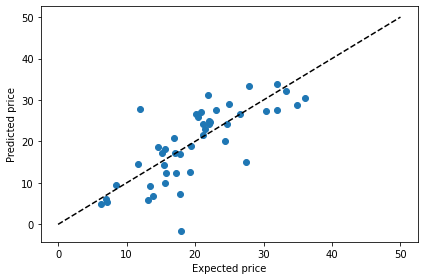

In [18]:
plt.scatter(val_Y, preds_pca)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

### Advanced Linear Regression -  Ridge, Lasso and ElasticNet

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = {
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
}

In [22]:
pred_record = {}
for name, model in models.items():
    # TODO: Load your machine learning model
    curr_model = model
    # TODO: Train!
    curr_model.fit(train_X, train_Y)
    # TODO: make prediction with unseen data!
    preds = curr_model.predict(val_X)
    # TODO: what is mse between the answer and your prediction?
    mse = mean_squared_error(val_Y, preds)
    print('{} MSE: {}'.format(name, mse))
    # Record predictions for every model
    pred_record.update({name : preds})

Ridge MSE: 28.410306658374967
Lasso MSE: 26.05058139921558
ElasticNet MSE: 26.1153720556785


Now, let's compare these models' performance visually.

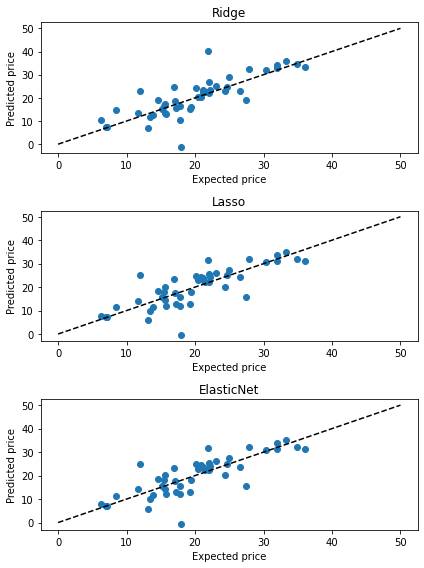

In [21]:
model_names = models.keys()
fig = plt.figure(figsize=(6, 8))
i=1
for model in model_names:
    prediction = pred_record[model]
    plt.subplot(310+i)
    plt.scatter(val_Y, prediction)
    plt.plot([0, 50], [0, 50], '--k')
    plt.xlabel('Expected price')
    plt.ylabel('Predicted price')
    plt.tight_layout()
    plt.title(model)
    i+=1

## 2. Logistic Regression

Useful videos:
1. [Andrew Ng's explanation 1](https://www.youtube.com/watch?v=-la3q9d7AKQ)
2. [Andrew Ng's explanation 2](https://www.youtube.com/watch?v=t1IT5hZfS48)
3. [Andrew Ng's explanation 3](https://www.youtube.com/watch?v=F_VG4LNjZZw)
4. [Andrew Ng's explanation 4](https://www.youtube.com/watch?v=HIQlmHxI6-0)

Logistic regression is a well-motivated approach to discriminative classification which leads to a smooth, convex, optimisation problem.  

Logistic regression is also a basis of Neural Network. Logistic Regression is sometimes called, a single node of Artificial Neuron. We will get back to what this means afterwards when we are doing Deep Learning.

#### In which case do we use classification?

Let's firstly generate a toy dataset that is suitable for classification

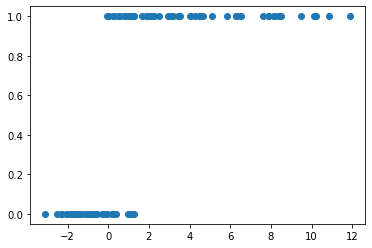

In [57]:
def generateDataset(seed=0):
    np.random.seed(seed)
    n_samples= 100

    X = np.random.normal(size=n_samples)
    y = (X > 0).astype(np.float)

    X[X > 0] *= 5
    X += .7 * np.random.normal(size=n_samples)
    X = X[:, np.newaxis]
    return X, y

X_train, y_train = generateDataset(seed=0)
plt.scatter(X_train, y_train)

What if our data looks like the above? Would you still use your linear regression model?  
Probably not. When your data has classes and your task is to classify the data, you normally use classification method, and Logistic Regression is a good start in learning classification.  
Please do watch the Andrew Ng's video on Logistic Regression to fully understand mathematically.  

Plus, note the the term 'logistic regression' has a word 'regression' inside.  
It is because the logistic regression is a generalised linear model using the same basic formula of linear regression but it is regressing for the probability of a categorical outcome by using `sigmoid` function.

In [55]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(X, y)

LogisticRegression()

Now, let's generate another group of data to evaluate (test) our model.

In [67]:
from sklearn.metrics import classification_report,accuracy_score

X_test, y_test = generateDataset(seed=45)
preds_logistic = logistic_clf.predict(X_test)
# Evaluate the model
print('Accuracy on test set: '+str(accuracy_score(y_test,preds_logistic)))
print(classification_report(y_test,preds_logistic))

Accuracy on test set: 0.94
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        59
         1.0       0.93      0.93      0.93        41

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



The function called `compare_logistic_linear` fits the data into the logistic regression model and a simple ordinary least squared linear regression model. Then, it plots the two in one plot for better visual representation on why you should consider using classification rather than regression.  

In [68]:
from scipy.special import expit

def compare_logistic_linear(model, X_data, y_data):
    """
    This function plots the given data - X_data and y_data
    then fit the data both into given `model` and LinearRegression model.
    Then shows the difference by plotting both of them.
    """
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)
    
    # Ordinary Least Squared Linear Regression
    ols = LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

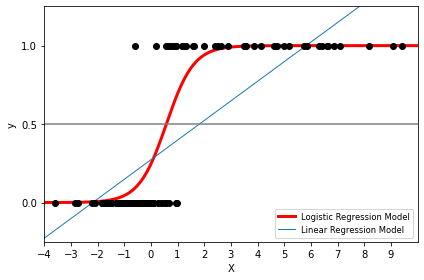

In [69]:
compare_logistic_linear(logistic_clf, X_test, y_test)